This Project Predicts whether Individuals in Kenya, Uganda, Tanzania and Rwanda hold a bank account.

In [2]:
# Load the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import joblib

In [3]:
# Load the training and testing sets
df = pd.read_csv("/content/Train.csv")
df.head(5)

,country,year,uniqueid,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type,bank_account
0,Kenya,2018,uniqueid_1,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed,Yes
1,Kenya,2018,uniqueid_2,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent,No
2,Kenya,2018,uniqueid_3,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed,Yes
3,Kenya,2018,uniqueid_4,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private,No
4,Kenya,2018,uniqueid_5,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed,No


In [4]:
df.shape

(23524, 13)

Data Sanity Checks

In [5]:
# Check for missing values in both datasets
df.isnull().sum()

,0
country,0
year,0
uniqueid,0
location_type,0
cellphone_access,0
household_size,0
age_of_respondent,0
gender_of_respondent,0
relationship_with_head,0
marital_status,0


There are no missing values in the datasets

In [ ]:
# Check for duplicates in the datasets
df.duplicated().sum()

np.int64(0)

There are no duplicates in the datasets

In [ ]:
# Check for data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   country                 23524 non-null  object
 1   year                    23524 non-null  int64 
 2   uniqueid                23524 non-null  object
 3   location_type           23524 non-null  object
 4   cellphone_access        23524 non-null  object
 5   household_size          23524 non-null  int64 
 6   age_of_respondent       23524 non-null  int64 
 7   gender_of_respondent    23524 non-null  object
 8   relationship_with_head  23524 non-null  object
 9   marital_status          23524 non-null  object
 10  education_level         23524 non-null  object
 11  job_type                23524 non-null  object
 12  bank_account            23524 non-null  object
dtypes: int64(3), object(10)
memory usage: 2.3+ MB


Exploratory Data Analysis

CrossTab Function

In [7]:
country_bank_account = pd.DataFrame(pd.crosstab(df['country'], df['bank_account']))
print(country_bank_account)

bank_account    No   Yes
country                 
Kenya         4547  1521
Rwanda        7732  1003
Tanzania      6013   607
Uganda        1920   181


<Figure size 1000x600 with 0 Axes>

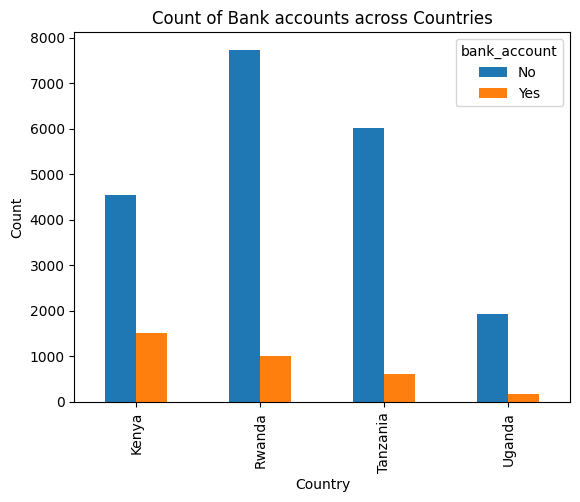

In [8]:
plt.figure(figsize=(10,6))
country_bank_account.plot(kind='bar', legend=True)
plt.title('Count of Bank accounts across Countries')
plt.xlabel('Country')
plt.ylabel('Count')
plt.show()

In this dataset, Rwanda has the highest number of individuals with no bank accounts, this is followed by Tanzania closely.

Similarly, Kenya has the highest number of individuals with bank accounts, its followed by Rwanda, but with a slightly high range.

In [ ]:
# An aggregate count of Country and location type
location_country = pd.crosstab(df['country'], df['location_type'])
print(location_country)

location_type  Rural  Urban
country                    
Kenya           3543   2525
Rwanda          7483   1252
Tanzania        1809   4811
Uganda          1508    593


<Figure size 1000x600 with 0 Axes>

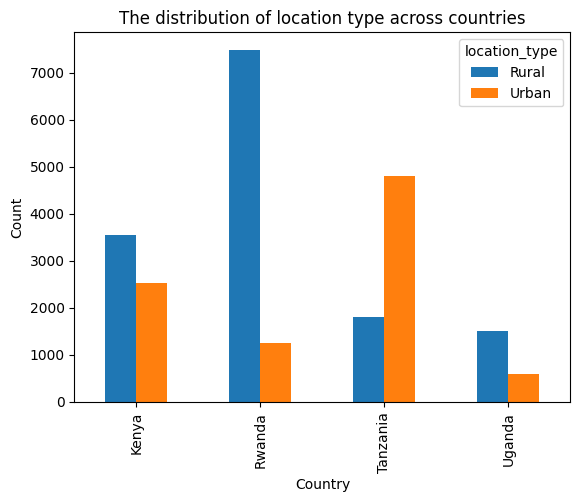

In [ ]:
plt.figure(figsize=(10,6))
location_country.plot(kind='bar', legend=True)
plt.title('The distribution of location type across countries')
plt.xlabel('Country')
plt.ylabel('Count')
plt.show()

The distribution of dataset across the countries is biased (not balanced). Otherwise, most Tanzanians stay in urban centers, while most Rwandans live in Rural areas.

In [ ]:
# Mean age of respondents
age_country = pd.DataFrame(df.groupby('country')['age_of_respondent'].mean())
print(age_country)

          age_of_respondent
country                    
Kenya             39.616348
Rwanda            39.292959
Tanzania          38.479607
Uganda            35.460733


<Figure size 1000x600 with 0 Axes>

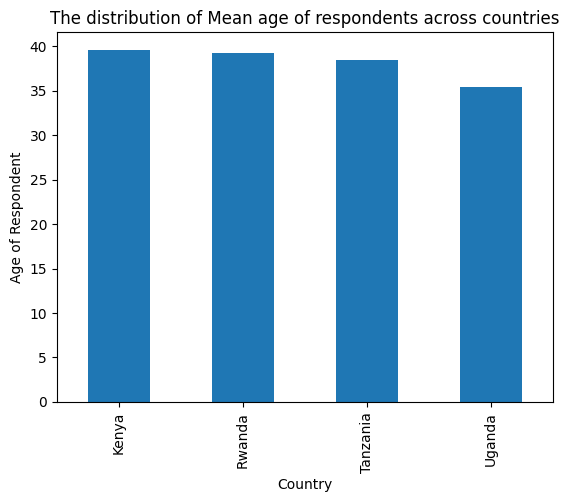

In [ ]:
plt.figure(figsize=(10,6))
age_country.plot(kind='bar', legend=False)
plt.title('The distribution of Mean age of respondents across countries')
plt.xlabel('Country')
plt.ylabel('Age of Respondent')
plt.show()

The mean age of respondents across countries is approximately 39 years for Kenya and Rwanda. Tanzania is approx. 38 years and Uganda is approx. 35 years.

In [ ]:
# Dataframe of country and cellphone access
cellphone_country = pd.DataFrame(pd.crosstab(df['country'], df['cellphone_access']))
print(cellphone_country)

cellphone_access    No   Yes
country                     
Kenya             1283  4785
Rwanda            1486  7249
Tanzania          2664  3956
Uganda             637  1464


<Figure size 1000x600 with 0 Axes>

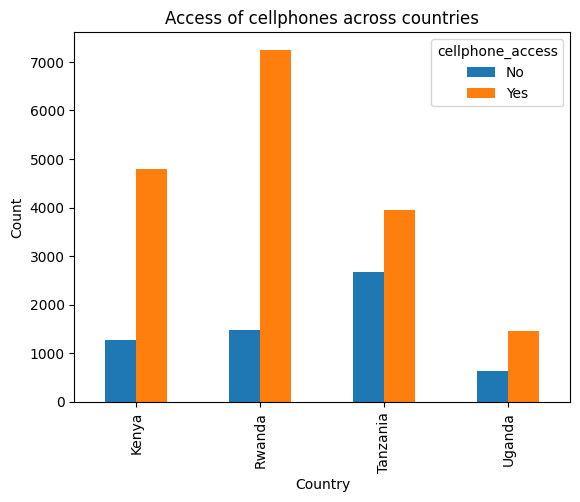

In [ ]:
plt.figure(figsize=(10,6))
cellphone_country.plot(kind='bar', legend=True)
plt.title('Access of cellphones across countries')
plt.xlabel('Country')
plt.ylabel('Count')
plt.show()

In [ ]:
# Marital status across countries
marital_country = pd.DataFrame(pd.crosstab(df['country'], df['marital_status']))
print(marital_country)

marital_status  Divorced/Seperated  Dont know  ...  Single/Never Married  Widowed
country                                        ...                               
Kenya                          354          8  ...                  1508      675
Rwanda                         474          0  ...                  1867     1198
Tanzania                      1081          0  ...                  4229      643
Uganda                         167          0  ...                   379      192

[4 rows x 5 columns]


<Figure size 1000x600 with 0 Axes>

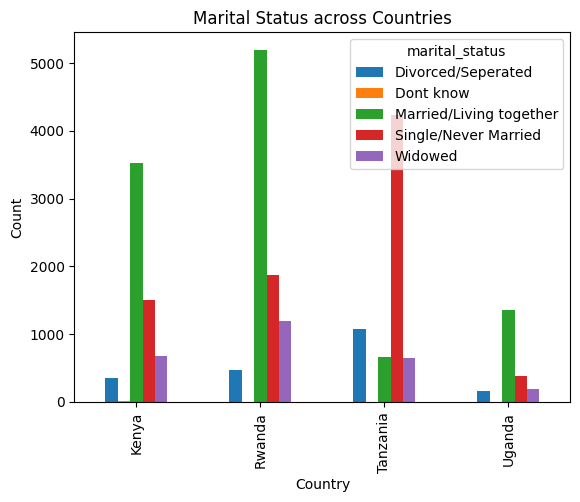

In [ ]:
plt.figure(figsize=(10,6))
marital_country.plot(kind='bar', legend=True)
plt.title('Marital Status across Countries')
plt.xlabel('Country')
plt.ylabel('Count')
plt.show()

In [ ]:
# Education level across countries
education_country = pd.DataFrame(pd.crosstab(df['country'], df['education_level']))
print(education_country)

education_level  No formal education  ...  Vocational/Specialised training
country                               ...                                 
Kenya                            941  ...                              442
Rwanda                          2122  ...                               91
Tanzania                        1133  ...                              171
Uganda                           319  ...                               99

[4 rows x 6 columns]


<Figure size 1000x600 with 0 Axes>

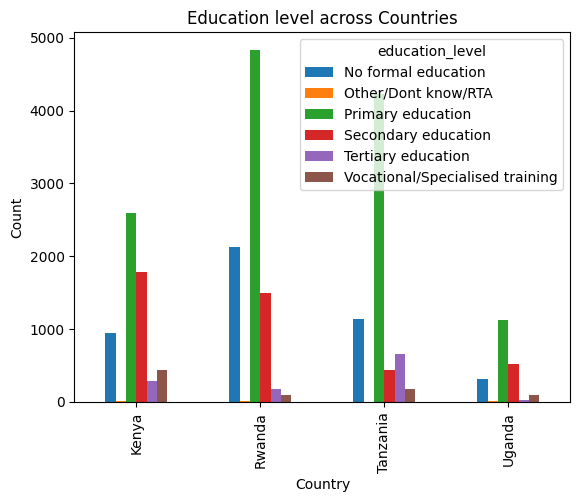

In [ ]:
plt.figure(figsize=(10,6))
education_country.plot(kind='bar', legend=True)
plt.title('Education level across Countries')
plt.xlabel('Country')
plt.ylabel('Count')
plt.show()

Automating the Preprocessing and Fitting steps

In [9]:
df = df.drop(columns=['year','uniqueid'], axis=1)

In [10]:
df.head(5)

,country,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type,bank_account
0,Kenya,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed,Yes
1,Kenya,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent,No
2,Kenya,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed,Yes
3,Kenya,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private,No
4,Kenya,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed,No


In [11]:
# Define the variables
X = df.drop('bank_account', axis=1)
y = df['bank_account']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
# Define numeric columns
numeric_cols = ['household_size', 'age_of_respondent']

In [13]:
# Define categorical columns
categorical_columns = ['country','location_type', 'cellphone_access', 'gender_of_respondent',
       'relationship_with_head', 'marital_status', 'education_level',
       'job_type']

In [14]:
categorical_transformer = OneHotEncoder()

In [15]:
numerical_transformer = StandardScaler()

In [16]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numeric_cols),
        ('cat', categorical_transformer, categorical_columns)
    ]
)

In [17]:
# Define pipeline
pipe = Pipeline(steps=[
    ('prep', preprocessor),
    ('clf', LogisticRegression(max_iter=1000, random_state=42))
])

In [18]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['household_size',
                                                   'age_of_respondent']),
                                                 ('cat', OneHotEncoder(),
                                                  ['country', 'location_type',
                                                   'cellphone_access',
                                                   'gender_of_respondent',
                                                   'relationship_with_head',
                                                   'marital_status',
                                                   'education_level',
                                                   'job_type'])])),
                ('clf', LogisticRegression(max_iter=1000, random_state=42))])

In [19]:
y_pred = pipe.predict(X_test)

In [20]:
from sklearn.metrics import classification_report, accuracy_score
print(f"Accuracy Score: {accuracy_score(y_pred, y_test)}")

Accuracy Score: 0.8858660998937301


In [21]:
pipe_rf = Pipeline(steps = [
    ('prep', preprocessor),
    ('Classifier', RandomForestClassifier(n_estimators=100, random_state=42))
])

In [22]:
pipe_rf.fit(X_train, y_train)

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['household_size',
                                                   'age_of_respondent']),
                                                 ('cat', OneHotEncoder(),
                                                  ['country', 'location_type',
                                                   'cellphone_access',
                                                   'gender_of_respondent',
                                                   'relationship_with_head',
                                                   'marital_status',
                                                   'education_level',
                                                   'job_type'])])),
                ('Classifier', RandomForestClassifier(random_state=42))])

In [23]:
y_pred1 = pipe_rf.predict(X_test)

In [24]:
print(f"Accuracy Score: {accuracy_score(y_pred1, y_test)}")

Accuracy Score: 0.8603613177470776


In [25]:
# Save the Pipeline
joblib.dump(pipe, 'bank_account_pipeline.pkl')


['bank_account_pipeline.pkl']

In [ ]:
df.columns

Index(['country', 'year', 'uniqueid', 'location_type', 'cellphone_access',
       'household_size', 'age_of_respondent', 'gender_of_respondent',
       'relationship_with_head', 'marital_status', 'education_level',
       'job_type', 'bank_account'],
      dtype='object')